# Data Extraction

# Importing libraries and NOAA Reef Bleaching dataset

In [1]:
%matplotlib inline

In [2]:
from numpy import arange
import numpy
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [3]:
columns = ['Bleaching','Ocean','Year','Depth','Storms','Human Impact','Siltation','Dynamite','Poison','Sewage','Industrial','Commercial']
df = pd.read_csv(r"C:/Users/Aadya/Downloads/NOAA_reef_check_bleaching_data.csv")

In [4]:
df.columns = columns
df.head()

,Bleaching,Ocean,Year,Depth,Storms,Human Impact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,No,Atlantic,2005,4.0,yes,high,often,none,none,high,none,none
1,No,Red Sea,2004,6.0,no,high,occasionally,none,none,low,none,none
2,No,Pacific,1998,3.0,no,low,never,none,none,none,low,none
3,No,Pacific,1998,10.0,no,low,never,none,none,none,low,none
4,No,Atlantic,1997,10.0,no,high,never,none,none,high,moderate,none


Removing the first row of the dataset. It will be used later.

In [5]:
#Total rows in the original dataframe
len(df.axes[0])

9111

In [6]:
#Original dataframe
df.head(2)

,Bleaching,Ocean,Year,Depth,Storms,Human Impact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,No,Atlantic,2005,4.0,yes,high,often,none,none,high,none,none
1,No,Red Sea,2004,6.0,no,high,occasionally,none,none,low,none,none


In [7]:
#Assigning first row of the dataframe to 'row' variable
row = df.iloc[0]
row=list(row)
print(row)

['No', 'Atlantic', 2005, 4.0, 'yes', 'high', 'often', 'none', 'none', 'high', 'none', 'none']


In [8]:
#Removing first row from the dataframe
df = df.drop([0],axis=0)

In [9]:
#New dataframe
df.head(1)

,Bleaching,Ocean,Year,Depth,Storms,Human Impact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
1,No,Red Sea,2004,6.0,no,high,occasionally,none,none,low,none,none


In [10]:
#Total rows in the new dataframe
len(df.axes[0])

9110

# Data Exploration

In [11]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9110 entries, 1 to 9110
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bleaching     9110 non-null   object 
 1   Ocean         9110 non-null   object 
 2   Year          9110 non-null   int64  
 3   Depth         9110 non-null   float64
 4   Storms        9110 non-null   object 
 5   Human Impact  9110 non-null   object 
 6   Siltation     9110 non-null   object 
 7   Dynamite      9110 non-null   object 
 8   Poison        9110 non-null   object 
 9   Sewage        9110 non-null   object 
 10  Industrial    9110 non-null   object 
 11  Commercial    9110 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 925.2+ KB


In [12]:
#Data types of the dataset columns
df.dtypes

Bleaching        object
Ocean            object
Year              int64
Depth           float64
Storms           object
Human Impact     object
Siltation        object
Dynamite         object
Poison           object
Sewage           object
Industrial       object
Commercial       object
dtype: object

In [13]:
#Memory used by each column in the dataset
df.memory_usage()

Index           72880
Bleaching       72880
Ocean           72880
Year            72880
Depth           72880
Storms          72880
Human Impact    72880
Siltation       72880
Dynamite        72880
Poison          72880
Sewage          72880
Industrial      72880
Commercial      72880
dtype: int64

In [14]:
#Total memory used by the dataset
df.memory_usage().sum()

947440

# Data Cleaning

In [15]:
#Check if there are missing values in the dataset
df.isnull().sum().sum()

0

In [16]:
#Check if there are duplicate rows in the dataset
df.duplicated().sum()

2412

In [17]:
#Removing duplicates from the dataset
df.drop_duplicates(keep="first",inplace=True)

In [18]:
#Check if duplicate rows have been removed successfully from the dataset
df.duplicated().sum()

0

Label encoding columns having non-integer values

In [19]:
df['Human Impact'].replace({'none':0,'low':1,'moderate':2,'high':3},inplace=True)

In [20]:
df['Siltation'].replace({'never':0,'occasionally':1,'often':2,'always':3},inplace=True)

In [21]:
df['Dynamite'].replace({'none':0,'low':1,'moderate':2,'high':3},inplace=True)

In [22]:
df['Poison'].replace({'none':0,'low':1,'moderate':2,'high':3},inplace=True)

In [23]:
df['Sewage'].replace({'none':0,'low':1,'moderate':2,'high':3},inplace=True)

In [24]:
df['Industrial'].replace({'none':0,'low':1,'moderate':2,'high':3},inplace=True)

In [25]:
df['Storms'].replace({'yes':1,'no':0},inplace=True)

In [26]:
df['Commercial'].replace({'none':0,'low':1,'moderate':2,'high':3},inplace=True)

In [27]:
df['Bleaching'].replace({'Yes':1,'No':0},inplace=True)

In [28]:
df['Ocean'].replace({'Atlantic':0,'Pacific':1,'Red Sea':2,'East Pacific':3,'Arabian Gulf':4,'Indian':5},inplace=True)

In [29]:
#Data after Label encoding
df.head()

,Bleaching,Ocean,Year,Depth,Storms,Human Impact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
1,0,2,2004,6.0,0,3,1,0,0,1,0,0
2,0,1,1998,3.0,0,1,0,0,0,0,1,0
3,0,1,1998,10.0,0,1,0,0,0,0,1,0
4,0,0,1997,10.0,0,3,0,0,0,3,2,0
5,0,0,1998,6.0,0,1,0,0,0,0,0,0


# Data Visualization

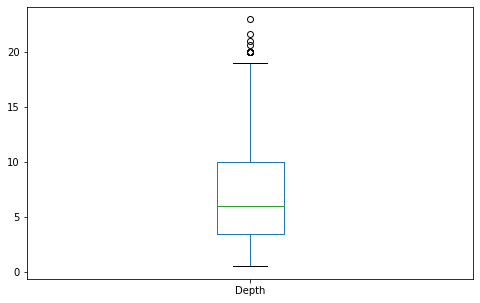

In [30]:
#Boxplot
df['Depth'].plot.box(figsize=(8, 5));

<AxesSubplot:>

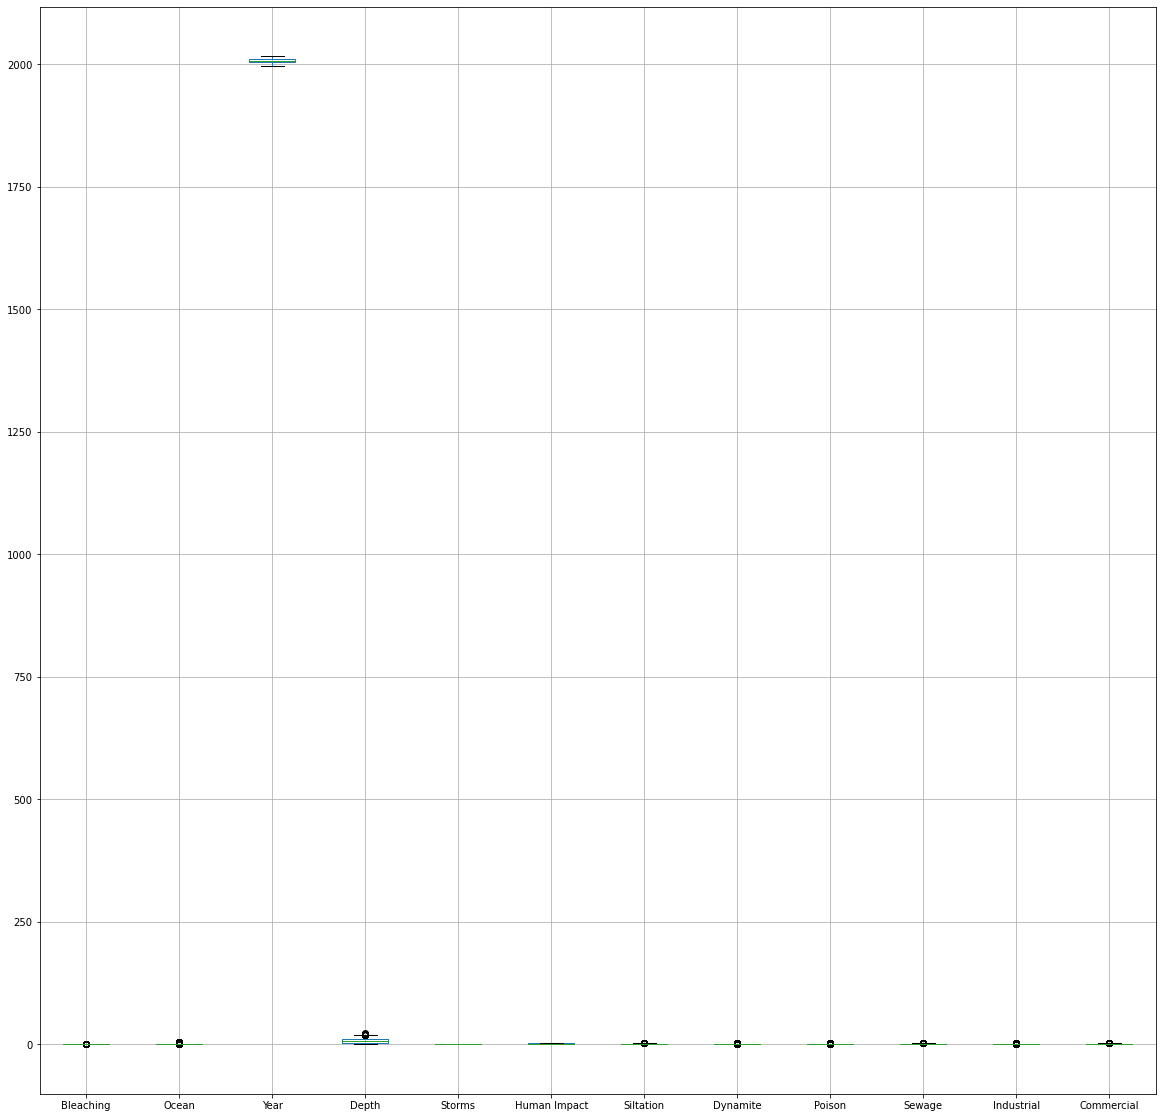

In [31]:
#Boxplot of all the columns with numerical data
df.boxplot(figsize=(20,20))

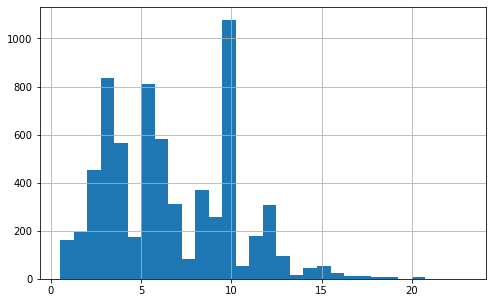

In [32]:
#Histogram
df['Depth'].hist(bins=30, figsize=(8, 5));

(0.0, 25.0)

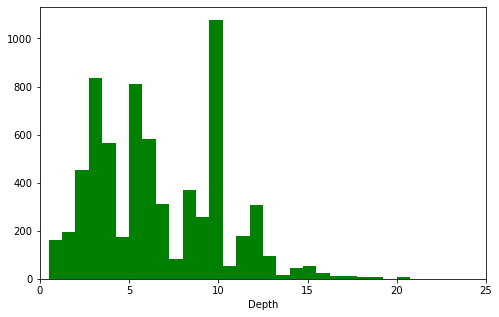

In [33]:
#Histogram with details
ax = df['Depth'].hist(bins=30, grid=False, color='green', figsize=(8, 5)) #grid turned off and colour changed
ax.set_xlabel('Depth')
ax.set_xlim(0,25) #limiting display range to 0-25 for the x-axis

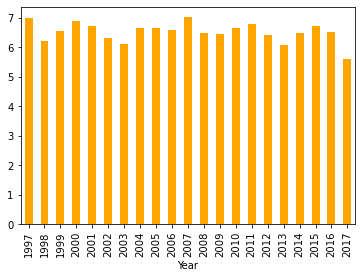

In [34]:
#Barplot
df_avg_depth = df.groupby('Year')['Depth'].mean()
df_avg_depth[:].plot.bar(color='orange');

<AxesSubplot:xlabel='Year', ylabel='Depth'>

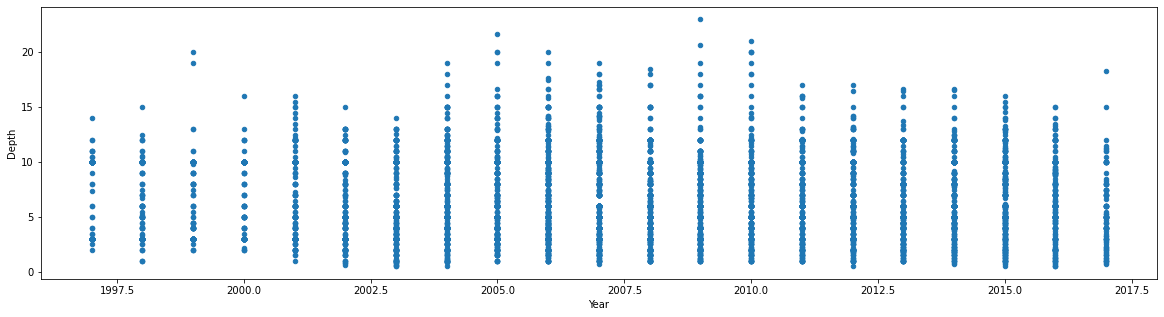

In [35]:
#Scatterplot
df.plot.scatter('Year','Depth',figsize=(20,5))

In [36]:
#No. of rows in the dataset after cleaning
print(len(df.axes[0]))

6698


In [37]:
#Data types of dataset columns after label encoding
df.dtypes

Bleaching         int64
Ocean             int64
Year              int64
Depth           float64
Storms            int64
Human Impact      int64
Siltation         int64
Dynamite          int64
Poison            int64
Sewage            int64
Industrial        int64
Commercial        int64
dtype: object

In [38]:
#Statistics for all the dataset columns
df.describe()

,Bleaching,Ocean,Year,Depth,Storms,Human Impact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
count,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000
mean,0.032696,1.252314,2007.597342,6.540520,0.537325,1.528367,0.682443,0.206480,0.188265,0.719170,0.256345,0.788295
std,0.177854,1.373592,4.857489,3.565542,0.498642,0.816537,0.766784,0.594565,0.526666,0.780794,0.587417,0.979391
min,0.000000,0.000000,1997.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2004.000000,3.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2007.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,2011.000000,10.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,5.000000,2017.000000,23.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [39]:
#Variance
df.var()

Bleaching        0.031632
Ocean            1.886754
Year            23.595197
Depth           12.713093
Storms           0.248644
Human Impact     0.666733
Siltation        0.587958
Dynamite         0.353507
Poison           0.277378
Sewage           0.609640
Industrial       0.345058
Commercial       0.959206
dtype: float64

In [40]:
#Skewness
df.skew()

Bleaching       5.256487
Ocean           1.829524
Year           -0.005202
Depth           0.546119
Storms         -0.149750
Human Impact    0.234679
Siltation       0.980897
Dynamite        3.181944
Poison          3.048071
Sewage          0.968680
Industrial      2.529821
Commercial      0.953236
dtype: float64

In [41]:
#Kurtosis
df.kurtosis()

Bleaching       25.638307
Ocean            2.491713
Year            -0.739035
Depth           -0.224319
Storms          -1.978166
Human Impact    -0.550403
Siltation        0.529588
Dynamite         9.935373
Poison           9.280377
Sewage           0.563554
Industrial       6.436473
Commercial      -0.304869
dtype: float64

# Data Selection

In [42]:
#Column-wise correlation in the dataset
df.corr()

,Bleaching,Ocean,Year,Depth,Storms,Human Impact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
Bleaching,1.000000,0.019402,-0.267007,0.005963,0.022437,0.003380,-0.155977,0.033580,0.021951,-0.001611,0.014093,-0.145419
Ocean,0.019402,1.000000,-0.015341,-0.065300,-0.156329,-0.095182,-0.139408,0.012076,-0.007465,-0.047810,-0.086095,-0.114461
Year,-0.267007,-0.015341,1.000000,-0.012709,0.017641,-0.012913,0.186600,-0.017068,-0.042331,0.041363,0.012422,0.214218
Depth,0.005963,-0.065300,-0.012709,1.000000,-0.019571,-0.051463,-0.054420,0.009168,-0.010695,0.017368,0.037545,0.101587
Storms,0.022437,-0.156329,0.017641,-0.019571,1.000000,0.071297,0.022608,-0.045389,-0.029320,-0.005098,-0.013553,0.037280
Human Impact,0.003380,-0.095182,-0.012913,-0.051463,0.071297,1.000000,0.240598,0.217227,0.219698,0.365101,0.196686,0.188814
Siltation,-0.155977,-0.139408,0.186600,-0.054420,0.022608,0.240598,1.000000,-0.002233,0.022348,0.167271,0.172137,0.239735
Dynamite,0.033580,0.012076,-0.017068,0.009168,-0.045389,0.217227,-0.002233,1.000000,0.716057,0.053519,0.089558,0.177906
Poison,0.021951,-0.007465,-0.042331,-0.010695,-0.029320,0.219698,0.022348,0.716057,1.000000,0.116970,0.111372,0.169627
Sewage,-0.001611,-0.047810,0.041363,0.017368,-0.005098,0.365101,0.167271,0.053519,0.116970,1.000000,0.312602,0.211236


In [43]:
#Import seaborn library
import seaborn as sns
#Set the size of the heatmap
sns.set(rc={'figure.figsize':(15,10)})

<AxesSubplot:>

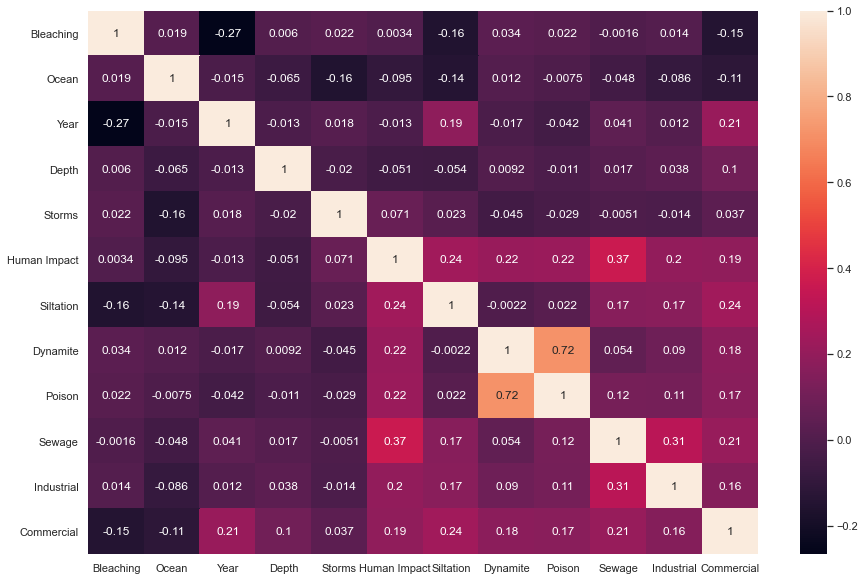

In [44]:
#Pearson correlation
sns.heatmap(df.corr('pearson'),annot=True)

<AxesSubplot:>

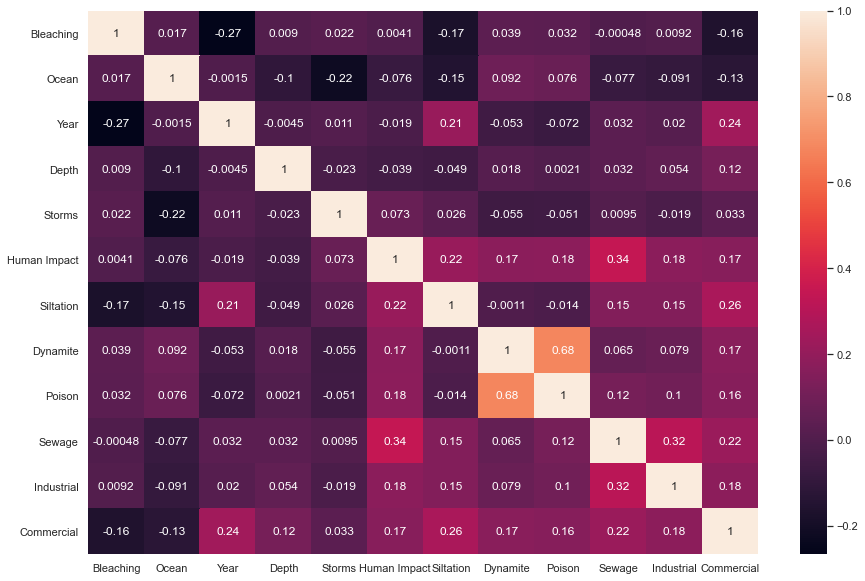

In [45]:
#Spearman correlation
sns.heatmap(df.corr('spearman'),annot=True)

<AxesSubplot:>

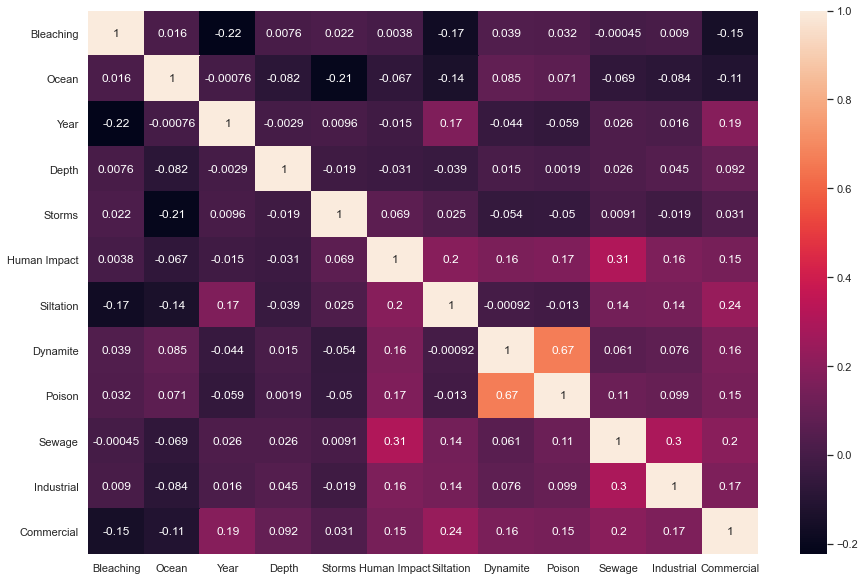

In [46]:
#Kendall correlation
sns.heatmap(df.corr('kendall'),annot=True)

Pearson, Spearman and Kendall all give similar results.

Target column: Bleaching

Pearson correlation results in:

Columns Year, Siltation and Commercial are the least correlated to the target column Bleaching. They are dropped.

In [47]:
df=df.drop(['Year','Siltation','Commercial'],axis=1)

In [48]:
df.replace('', numpy.nan, inplace=True)

In [49]:
df.dropna(inplace=True)

In [50]:
df.head()

,Bleaching,Ocean,Depth,Storms,Human Impact,Dynamite,Poison,Sewage,Industrial
1,0,2,6.0,0,3,0,0,1,0
2,0,1,3.0,0,1,0,0,0,1
3,0,1,10.0,0,1,0,0,0,1
4,0,0,10.0,0,3,0,0,3,2
5,0,0,6.0,0,1,0,0,0,0


# Data Splitting and Model Building (Logistic regression)

Logistic Regression using sklearn

In [51]:
#Logistic regression model using sklearn
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [52]:
#Split in training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [53]:
#Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.fit_transform(X_test)

In [54]:
#Train the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [55]:
#Data predicted by the model
y_pred = clf.predict(X_test)

In [56]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1623,    0],
       [  52,    0]], dtype=int64)

In [57]:
#Model accuracy
clf.score(X_test, y_test)

0.968955223880597

In [58]:
#Co-efficients of the Logistic regression equation
clf.coef_

array([[ 0.11675652, -0.02698828,  0.07907409, -0.0796178 ,  0.1738843 ,
         0.02081151,  0.00597697,  0.08028884]])

In [59]:
#y-intercept of the Logistic regression equation
clf.intercept_

array([-3.40005738])

# Logistic regression equation

y -> target variable i.e. Bleaching

a -> y-intercept of Bleaching

b0 -> co-efficient of Ocean

b1 -> co-efficient of Depth

b2 -> co-efficient of Storms

b3 -> co-efficient of Human Impact

b4 -> co-efficient of Dynamite

b5 -> co-efficient of Poison

b6 -> co-efficient of Sewage

b7 -> co-efficient of Industrial

General equation: y = a + b0x0 + b1x1 + ... + bnxn

Actual equation: Bleaching = -3.4 + 0.1168(Ocean) - 0.027(Depth) + 0.0791(Storms) - 0.0796(Human Impact) + 0.1739(Dynamite) + 0.0208(Poison) + 0.006(Sewage) + 0.0803(Industrial)

# Model evaluation through k-fold cross validation and evaluation metrics

In [60]:
#K-fold cross-validation
#Logistic Regression
X = df.iloc[:,1:]
y = df.iloc[:,0]
k = 5
kf = model_selection.KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
result = cross_val_score(model , X, y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.967305518709663


In [61]:
#Root mean square error
import sklearn
sklearn.metrics.mean_squared_error(y_test,y_pred)

0.031044776119402984

In [62]:
#R2 score
import sklearn
sklearn.metrics.r2_score(y_test,y_pred)

-0.03203943314849078

Performing similar analysis for Pearson, Spearman and Kendall correlations gives the following results:

Accuracy through Logistic regression using sklearn:

Pearson: 0.968955223880597

Spearman: 0.9659701492537314

Kendall: 0.9707462686567164

Thus, Kendall correlation gives the most accurate results.

Average accuracy through K-fold cross validation:

Pearson: 0.967305518709663

Spearman: 0.966712405114086

Kendall: 0.9670109125767725

Thus, Pearson correlation gives the most accurate results.

RMSE (Root Mean Squar Error):

Pearson: 0.031044776119402984

Spearman: 0.03402985074626866

Kendall: 0.029253731343283584

Thus, Kendall correlation gives the least RMSE.

R2 score:

Pearson: -0.03203943314849078

Spearman: -0.03522867737948099

Kendall: -0.0509501126818277

Thus, Pearson correlation gives the best R2 score.

# Cross-checking the model with one of the dataset samples

In [63]:
#Bleaching didn't occur - 0
#Bleaching occured - 1
df.head(1)

,Bleaching,Ocean,Depth,Storms,Human Impact,Dynamite,Poison,Sewage,Industrial
1,0,2,6.0,0,3,0,0,1,0


In [64]:
if bool(clf.predict([[0,4,1,3,0,0,0,0]])):
    print("Bleaching will occur")
else:
    print("Bleaching will not occur")

Bleaching will not occur


# Using the model to predict whether bleaching will occur for unseen data

In [65]:
#Using the "row" saved earlier
#It is a data sample never seen by the model before
actual_bleaching = row[0]

if actual_bleaching:
    print("Bleaching doesn't actually occur")
else:
    print("Bleaching Actually occurs")

Bleaching doesn't actually occur


In [66]:
#Preparing the 'row' for prediction
row.pop()
row=[row[1]]+row[3:6]+row[7:]

#Original row
print("Original row: ",row)

#Label encoded row
row=[0,4.0,1,3,0,0,3,0]
print("Label encoded row: ",row)

Original row:  ['Atlantic', 4.0, 'yes', 'high', 'none', 'none', 'high', 'none']
Label encoded row:  [0, 4.0, 1, 3, 0, 0, 3, 0]


In [67]:
#Predicting using the model
predicted_bleaching = clf.predict([row])[0]

if bool(predicted_bleaching):
    predicted_bleaching = "Yes, Bleaching occurs"
else:
    predicted_bleaching = "No, Bleaching doesn't occur"

print(predicted_bleaching)

No, Bleaching doesn't occur


The predicted result for unseen data is correct.

# Conclusion

The analysis shows that -

Dynamite, Storms, Poison, Ocean and Industrial are the leading features to determine whether or not a coral reef will be bleached, in that order.

Depth, Human Impact and Sewage are important but not very significant factors, in the same order.

Commercial, Siltation and Year are least correlated to Bleaching, in the given order.